<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Exercise 6) Handwritten Digit Recognition from Paper Images</b><br>
Based on the topics we learned in previous chapters, use the model from Exercise 5 to recognize each handwritten digit in the image below and type it next to or above the digit. Note that unlike the Hoda dataset, the MNIST dataset has edge issues, which might affect your accuracy.
</div>

In [11]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

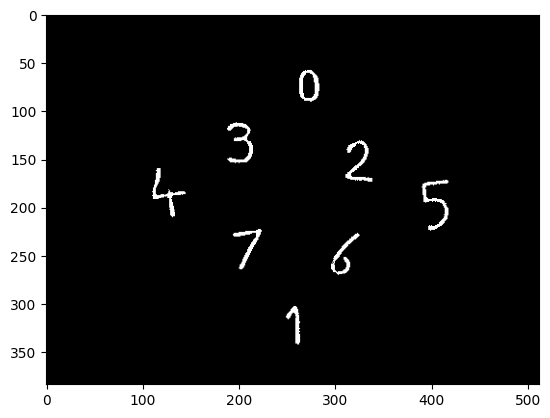

In [12]:
img =  cv2.imread('english-digits.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
noise_removed_gray = cv2.GaussianBlur(gray, (15,15), 0)
binary_img = cv2.adaptiveThreshold(noise_removed_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,5,2)
plt.imshow(binary_img, cmap='gray')

In [13]:
loaded_model = load_model('Melika_Rad_mnist_cnn_model.h5')

In [14]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img)
num_labels

9

1/1 [==============================] - 0s 14ms/step


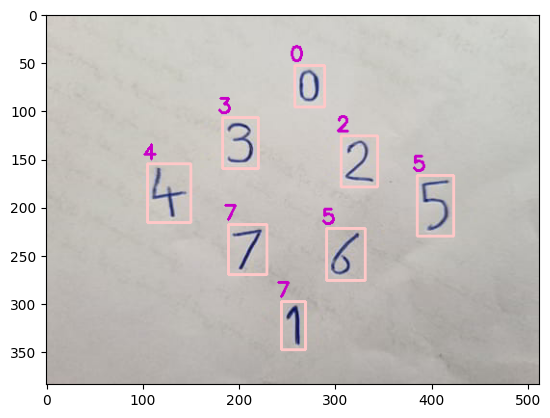

In [5]:
font = cv2.FONT_HERSHEY_SIMPLEX  
font_scale = 0.7
color = (200, 0, 200)  
thickness = 2  

for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > 10: 
        digit_image = binary_img[y-10:y+h+10, x-10:x+w+10]
        digit_image = cv2.resize(digit_image.astype('float32'), (28, 28) ) / 255.0
        digit_image = np.expand_dims(digit_image, axis=0)
        digit_image = np.expand_dims(digit_image, axis=-1)
        
        prediction = str(np.argmax(loaded_model.predict(digit_image)))
        cv2.rectangle(img, (x-5, y-5), (x+w+5, y+h+5), (200, 200, 255), 2)  
        position = (x-10 , y-10)
        cv2.putText(img, prediction, position, font, font_scale, color, thickness)

plt.imshow(img[:,:,::-1])